<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/DeepLearning/RNN_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
start = '2012-01-01'
end = '2021-05-27'
df = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-21,128.000000,125.209999,127.820000,125.430000,79209300.0,125.430000
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,127.099998
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.900002


In [ ]:
df.shape

(2366, 6)

<function matplotlib.pyplot.show>

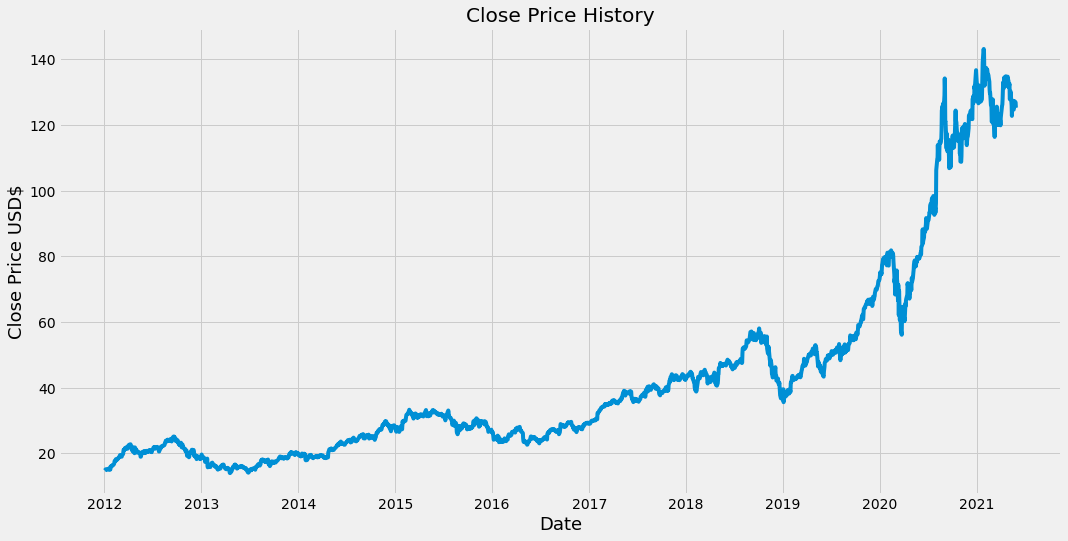

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD$', fontsize=18)
plt.show

In [ ]:
#Create a new datafram wiht only "Close column"
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


1893

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.87416077],
       [0.87377379],
       [0.86162326]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_traind datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1833, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
1833/1833 [==============================] - 43s 22ms/step - loss: 7.0267e-04
Epoch 2/20
1833/1833 [==============================] - 41s 22ms/step - loss: 1.2822e-04
Epoch 3/20
1833/1833 [==============================] - 40s 22ms/step - loss: 7.8909e-05
Epoch 4/20
1833/1833 [==============================] - 40s 22ms/step - loss: 6.4243e-05
Epoch 5/20
1833/1833 [==============================] - 40s 22ms/step - loss: 4.5856e-05
Epoch 6/20
1833/1833 [==============================] - 40s 22ms/step - loss: 7.4039e-05
Epoch 7/20
1833/1833 [==============================] - 41s 22ms/step - loss: 5.6064e-05
Epoch 8/20
1833/1833 [==============================] - 41s 22ms/step - loss: 5.0095e-05
Epoch 9/20
1833/1833 [==============================] - 40s 22ms/step - loss: 4.3304e-05
Epoch 10/20
1833/1833 [==============================] - 40s 22ms/step - loss: 4.3867e-05
Epoch 11/20
1833/1833 [==============================] - 40s 22ms/step - loss: 4.0468e-05
Epoch 12/20
1833/18

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert data to an numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean sqared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.8693350697168585

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

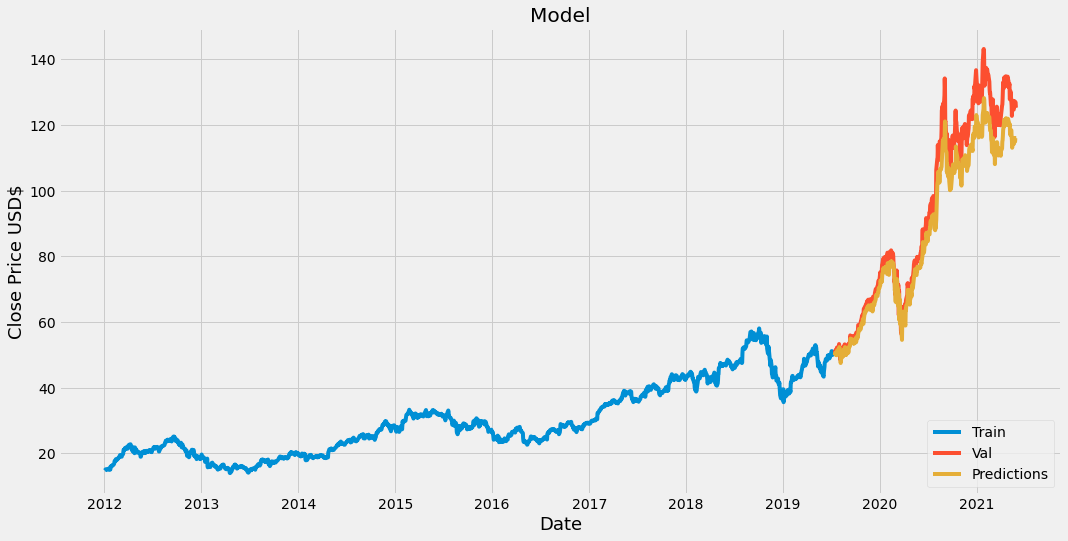

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-07-15,51.302502,49.986698
2019-07-16,51.125000,50.470119
2019-07-17,50.837502,50.336483
2019-07-18,51.415001,50.028683
2019-07-19,50.647499,50.538731
...,...,...
2021-05-21,125.430000,116.021553
2021-05-24,127.099998,114.956535
2021-05-25,126.900002,115.995010


In [ ]:
from google.colab import files
valid.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>